<a href="https://colab.research.google.com/github/PKpacheco/RRC_RPL_Python/blob/main/Paola_Katherine_RRC_Appendix_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2) Import modules


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier


# 3) read csv


In [ ]:
df_iris_url = ('https://raw.githubusercontent.com/PKpacheco/RRC_RPL_Python/main/Iris.csv')
df= pd.read_csv(df_iris_url,encoding = "utf-8")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 4) describe stats


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,149.000000,149.00000,149.000000,149.000000
mean,75.500000,5.843624,3.05302,3.774497,1.198658
std,43.445368,0.830851,0.43489,1.759651,0.765735
min,1.000000,4.300000,2.00000,1.000000,0.100000
25%,38.250000,5.100000,2.80000,1.600000,0.300000
50%,75.500000,5.800000,3.00000,4.400000,1.300000
75%,112.750000,6.400000,3.30000,5.100000,1.800000
max,150.000000,7.900000,4.40000,6.900000,2.500000


# 5) clean bad data 


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  149 non-null    float64
 2   SepalWidthCm   149 non-null    float64
 3   PetalLengthCm  149 non-null    float64
 4   PetalWidthCm   149 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df =(df.drop(['Id'], axis =1))

In [ ]:
# check null values
df.isnull().any().sum()

4

In [ ]:
# check NaN values
df.isna().any().sum()

4

In [ ]:
# check duplicated values

df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [ ]:
# delete Nan values
df1 = df.dropna()

In [ ]:
# check new dataset null values
df1.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

# 6) Seaborn (length vs width)

* We can see in the scatterplot that the majority of the Iris Setosa flowers are from 4.5 to a little less than 6cm in length and when the width is between 3 and 4 cm with some outliers.

* For the Iris versicolor, we note that despite being able to present the length and width of an iris virginica, it has most flowers between 6.0 and 7.0 cm in length and 2.5 and 3.5 cm in width

* As for Iris virginica, we observed a concentration between 5.5 and 6.5 cm for length and between 2.5 and 3.5 for width.

All species have outliers, but the iris setosa is the one that has the most similar characteristics for all flowers of the same species, having a high positive correlation since when X increases, Y increases.

For Versicolor we notice a linear  positive relation and Virginica we noticed neutral correlation.

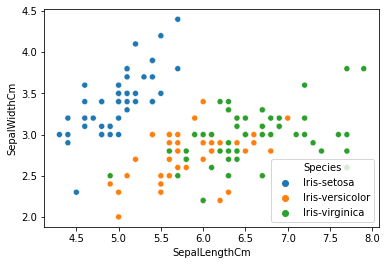

In [ ]:
# plot sepal length vs sepal width
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species" , data=df1)

# 7) Seaborn (petal length vs petal width)

Regarding the petal, we noticed that for the three types of flower, there is a positive linear relationship.

* Iris versicolor has a high positive linear relationship.
* Iris virginica also presents a positive linear relationship, but I do not consider it as a high relationship.
* Iris setosa has a neutral relationship.

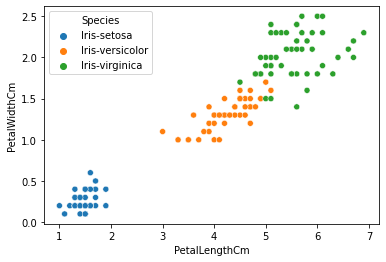

In [ ]:
# plot petal length vs petal width
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species" , data=df1)

# 8) Seaborn pairplot


Pairplot shows the dispersion of the data in relation to the other variables.

* We noticed that Setosa has a short length and is always well separated from the other 2 types of flowers. We could easily separate setosa from other flowers with just an if condition using x= petal with and y = petal length.



* We see a positive correlation between petal width and petal length as well as clearly seeing the flower types are separated.

* For the others, we see that iris setosa is always different, even without a positive correlation, we managed to separate it from the other flowers.

* We observed that the distribution of sepal width and sepal length are not similar.

* There are linear trends between iris versicolor and virginica, with positive correlation

Regarding graphics with one variable, we have a good division into petal width, sepal length and petal length. 
For sepal width we could not clearly separate the different types of flowers, we would perhaps need to add one more dimension so that it is easy to differentiate the flowers.

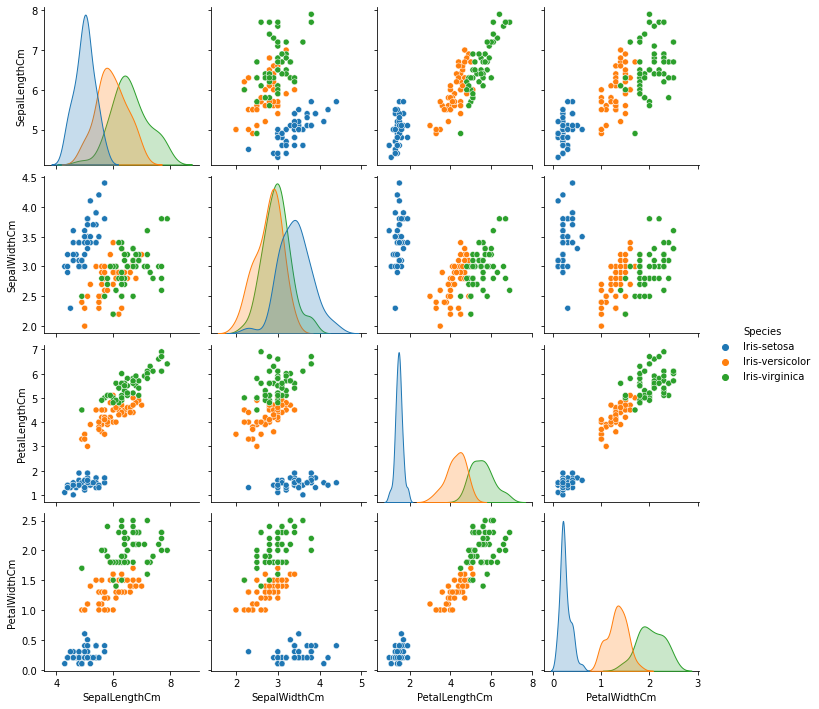

In [ ]:
# pairplot
sns.pairplot(df1, hue="Species")

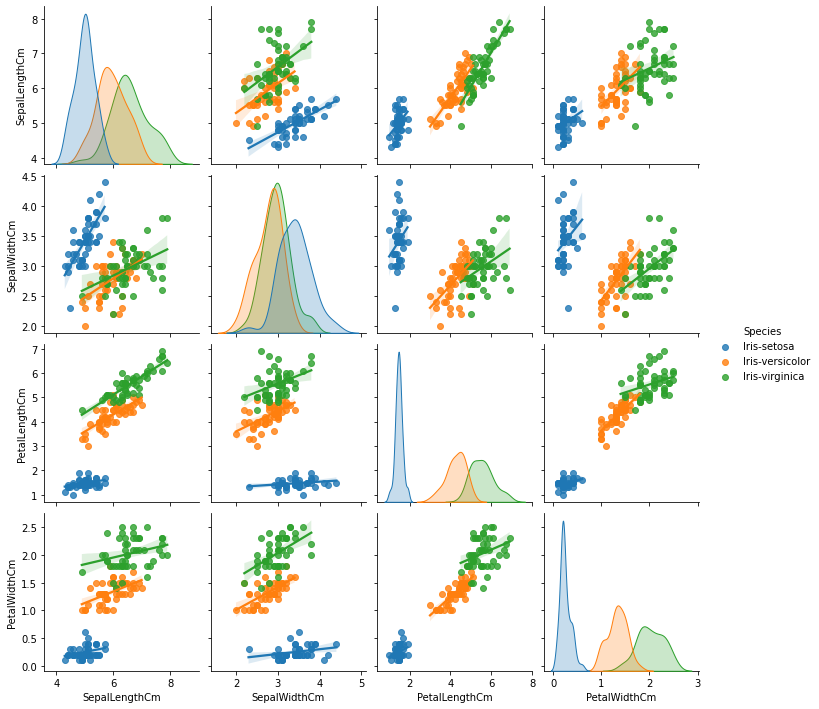

In [ ]:
sns.pairplot(df1, hue="Species", kind='reg', diag_kind='kde')

# 9) Split data

In [ ]:
df1.shape

(146, 5)

In [ ]:
df.groupby('Species').size()


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [ ]:
df1.describe

<bound method NDFrame.describe of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[146 rows x 5 columns]>

In [ ]:
from sklearn.model_selection import train_test_split

df_training, df_test = train_test_split(df1, test_size=0.2, random_state=5)
# separate x and y variables from data
df_training_y = df_training["Species"]
df_training_x = df_training.drop("Species", axis=1)

df_test_y = df_test["Species"]
df_test_x = df_test.drop("Species", axis=1)




In [ ]:

print(len(df_training_x))
print(len(df_test_x))
print(len(df_training_y))
print(len(df_test_y))


116
30
116
30


# 10) Create the model and 11) predict

In [ ]:
from sklearn import metrics

knn_model = KNeighborsClassifier(n_neighbors=1)

knn_model.fit(df_training_x,df_training_y)

prediction_y = knn_model.predict(df_test_x)

print('The accuracy of the KNN model is: ',metrics.accuracy_score(prediction_y,df_test_y))

The accuracy of the KNN model is:  0.9666666666666667


12) Print classification report

In [ ]:
from sklearn.metrics import classification_report

print( classification_report(prediction_y, df_test_y) ) 


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



# 13) knn.score method

In [ ]:
# print simplified score
knn_score = knn_model.score(df_test_x,df_test_y)
print (knn_score)

0.9666666666666667


# 14) repeat steps 9 to 12 with k=3,5,10,30,50

## k = 3

In [ ]:
df_1_training, df_1_test = train_test_split(df1, test_size=0.2, random_state=5)
# separate x and y variables from data
df_1_training_y = df_1_training["Species"]
df_1_training_x = df_1_training.drop("Species", axis=1)

df_1_test_y = df_1_test["Species"]
df_1_test_x = df_1_test.drop("Species", axis=1)


In [ ]:
knn_model_1 = KNeighborsClassifier(n_neighbors=3)

knn_model_1.fit(df_1_training_x,df_1_training_y)

prediction_y = knn_model_1.predict(df_1_test_x)

print(classification_report(prediction_y, df_1_test_y) )

knn_score_1 = knn_model_1.score(df_1_test_x,df_1_test_y)
print ('The score of the KNN model is: ',knn_score_1)


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

The score of the KNN model is:  0.9666666666666667


## k = 5

In [ ]:
df_2_training, df_2_test = train_test_split(df1, test_size=0.2, random_state=5)
# separate x and y variables from data
df_2_training_y = df_2_training["Species"]
df_2_training_x = df_2_training.drop("Species", axis=1)

df_2_test_y = df_2_test["Species"]
df_2_test_x = df_2_test.drop("Species", axis=1)


In [ ]:
knn_model_2 = KNeighborsClassifier(n_neighbors=5)

knn_model_2.fit(df_2_training_x,df_2_training_y)

prediction_y = knn_model_2.predict(df_2_test_x)

print(classification_report(prediction_y, df_2_test_y) )

knn_score_2 = knn_model_2.score(df_2_test_x,df_2_test_y)
print ('The score of the KNN model is: ',knn_score_2)


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

The score of the KNN model is:  0.9666666666666667


## k=10

In [ ]:
df_3_training, df_3_test = train_test_split(df1, test_size=0.2, random_state=5)
# separate x and y variables from data
df_3_training_y = df_3_training["Species"]
df_3_training_x = df_3_training.drop("Species", axis=1)

df_3_test_y = df_3_test["Species"]
df_3_test_x = df_3_test.drop("Species", axis=1)


In [ ]:
knn_model_3 = KNeighborsClassifier(n_neighbors=10)

knn_model_3.fit(df_3_training_x,df_3_training_y)

prediction_y = knn_model_3.predict(df_3_test_x)

print(classification_report(prediction_y, df_3_test_y) )

knn_score_3 = knn_model_3.score(df_3_test_x,df_3_test_y)
print ('The score of the KNN model is: ',knn_score_3)


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

The score of the KNN model is:  1.0


## k=30

In [ ]:
df_4_training, df_4_test = train_test_split(df1, test_size=0.2, random_state=5)
# separate x and y variables from data
df_4_training_y = df_4_training["Species"]
df_4_training_x = df_4_training.drop("Species", axis=1)

df_4_test_y = df_4_test["Species"]
df_4_test_x = df_4_test.drop("Species", axis=1)


In [ ]:
knn_model_4 = KNeighborsClassifier(n_neighbors=30)

knn_model_4.fit(df_4_training_x,df_4_training_y)

prediction_y = knn_model_4.predict(df_4_test_x)

print(classification_report(prediction_y, df_4_test_y) )

knn_score_4 = knn_model_4.score(df_4_test_x,df_4_test_y)
print ('The score of the KNN model is: ',knn_score_4)


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

The score of the KNN model is:  0.9666666666666667


## k=50

In [ ]:
df_5_training, df_5_test = train_test_split(df1, test_size=0.2, random_state=5)
# separate x and y variables from data
df_5_training_y = df_5_training["Species"]
df_5_training_x = df_5_training.drop("Species", axis=1)

df_5_test_y = df_5_test["Species"]
df_5_test_x = df_5_test.drop("Species", axis=1)


In [ ]:
knn_model_5 = KNeighborsClassifier(n_neighbors=50)

knn_model_5.fit(df_5_training_x,df_5_training_y)

prediction_y = knn_model_5.predict(df_5_test_x)

print(classification_report(prediction_y, df_5_test_y) )

knn_score_5 = knn_model_5.score(df_5_test_x,df_5_test_y)
print ('The score of the KNN model is: ',knn_score_5)


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.86      0.92        14
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.93        30
      macro avg       0.94      0.95      0.94        30
   weighted avg       0.95      0.93      0.93        30

The score of the KNN model is:  0.9333333333333333


In [ ]:
print( "For k=1, the score is :", knn_score)
print( "For k=3, the score is :", knn_score_1)
print( "For k=5, the score is :", knn_score_2)
print( "For k=10, the score is :", knn_score_3)
print( "For k=30, the score is :", knn_score_4)
print( "For k=50, the score is :", knn_score_5)

For k=1, the score is : 0.9666666666666667
For k=3, the score is : 0.9666666666666667
For k=5, the score is : 0.9666666666666667
For k=10, the score is : 1.0
For k=30, the score is : 0.9666666666666667
For k=50, the score is : 0.9333333333333333


# 15) K and best values

When the value of k, the neighbor, is very low (1, 3 and 5), the algorithm becomes more sensitive to the nearest neighbors, I believe that overfitting may occur and therefore the accuracy is not the greatest. 

Overfitting happens for the value too low, causing too fine a split to separate the data.

The same happens when the value is too high, like 30 and 50, in this case underfitting occurs, the values are poorly separated and the algorithm is not able to be accurate.

# 16) Choose K values for the best performance

## k=15 
The chosen value for k was 15.
In the 2 predictions, dataset values were inserted and the model  had 100% accuracy since it returned exactly the values that can be found in the dataset

In [ ]:
# k=15 
iris_training, iris_test = train_test_split(df1, test_size=0.2, random_state=5)
# separate x and y variables from data
iris_training_y = iris_training["Species"]
iris_training_x = iris_training.drop("Species", axis=1)

iris_test_y = iris_test["Species"]
iris_test_x = iris_test.drop("Species", axis=1)


In [ ]:
knn_model_final = KNeighborsClassifier(n_neighbors=15)

knn_model_final.fit(iris_training_x,iris_training_y)

prediction_y = knn_model_final.predict(iris_test_x)

print(classification_report(prediction_y, iris_test_y) )

knn_score_final = knn_model_final.score(iris_test_x,iris_test_y)
print ('The score of the KNN model is: ',knn_score_final)


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

The score of the KNN model is:  1.0


In [ ]:
df1.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# insert values from line 148 and predict
pred_1 = knn_model_final.predict([['6.2', '3.4', '5.4', '2.3']])
print(pred_1)

['Iris-virginica']


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [ ]:
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# insert values from line 0  and predict
pred_2 = knn_model_final.predict([['5.1', '3.5', '1.4', '0.2']])
print(pred_2)

['Iris-setosa']


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
